In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank_target = pd.read_csv('D:\Data_Science\Project\data\\raw\\bank_marketing_updated_v1.csv', skiprows = 2)
bank_target.head(5)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\RUSHANK\AppData\Local\Temp\ipykernel_17728\4284784556.py:1: SyntaxWarning: invalid escape sequence '\D'
  bank_target = pd.read_csv('D:\Data_Science\Project\data\\raw\\bank_marketing_updated_v1.csv', skiprows = 2)


,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [3]:
bank_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [4]:
bank_target.describe()

,customerid,age,salary,balance,day,campaign,pdays,previous
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,13051.435847,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [5]:
bank_target['age'].mean()

np.float64(40.93565090394105)

How let's split the Jobedu columns into Job and Education colums by spliting them

In [6]:
bank_target['Job'] = bank_target.jobedu.apply(lambda x: x.split(',')[0])
bank_target.head(5)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [7]:
bank_target['Education'] = bank_target.jobedu.apply(lambda x: x.split(',')[1])
bank_target.head(5)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,Job,Education
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,...,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


Now that we don't need the Jobedu column we can drop the column

In [8]:
bank_target.drop('jobedu', axis = 1, inplace=True)
bank_target.head(5)

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job,Education
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [9]:
bank_target.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
Job            0
Education      0
dtype: int64

Let's now look at the age column since there are about 20 missing values and it's seen that age is not important
we can drop the age where the vaules are missing 

This could be considered as a MCAR(Missing Completely at Random) where you can drop the values where NA

In [10]:
bank_target = bank_target[~bank_target.age.isnull()].copy()
bank_target.head(5)

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job,Education
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [11]:
print(bank_target.age.isnull().sum())
print(bank_target.shape)

0
(45191, 20)


Let's move to the month since it's something that we can take from a mean values
For all the NA vules let's replace them with the highes mean value

This is a MAR (Missing at Random) as we can make out the missing data of take values from a logic 

In [12]:
bank_target.month.isnull().sum()

np.int64(50)

In [13]:
bank_target.month.value_counts(normalize=True)

month
may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: proportion, dtype: float64

In [14]:
bank_target.month.mode()  ##This is to get the highest value

0    may, 2017
Name: month, dtype: object

In [15]:
month_mode = bank_target.month.mode()[0]  ##We use fillna to replace all the values where is there null value. And take the highest count as [0]
month_mode

'may, 2017'

In [16]:
bank_target.month.fillna(month_mode, inplace = True)

C:\Users\RUSHANK\AppData\Local\Temp\ipykernel_17728\3365498652.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_target.month.fillna(month_mode, inplace = True)


In [17]:
bank_target.month.value_counts(normalize=True)

month
may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: proportion, dtype: float64

In [18]:
bank_target.pdays.describe()

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

Here the -1 represents that the people were not contaced earlier so it's safe to assume that there are missing values.

There is no missing values as such but there are indications that tells that the values are missing 

What we want is to the missing values must not be ignored in the calculations
-- How to acheive this 

    Treat the -1 values with NaN values (make them missing)

In [19]:
bank_target.loc[bank_target.pdays<0, 'pdays'] = np.nan
bank_target.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [20]:
bank_target.isnull().sum()

customerid        0
age               0
salary            0
balance           0
marital           0
targeted          0
default           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays         36939
previous          0
poutcome          0
response         30
Job               0
Education         0
dtype: int64

Handling outliers 



In [21]:
bank_target.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

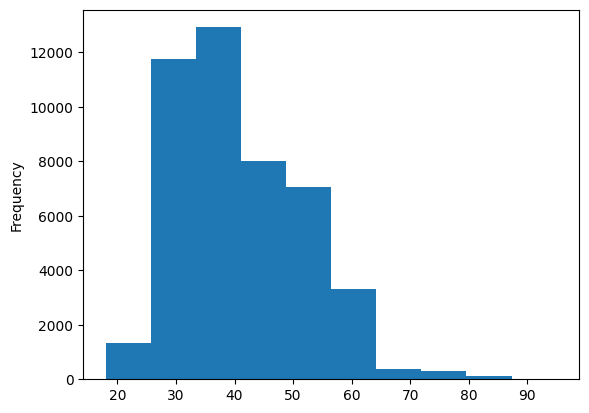

In [22]:
bank_target.age.plot.hist()


<Axes: ylabel='age'>

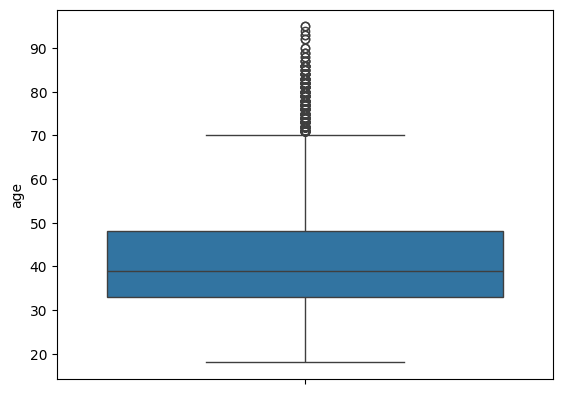

In [23]:
sns.boxplot(bank_target.age)

In [24]:
#Let's check for balances 

bank_target.balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

<Axes: ylabel='balance'>

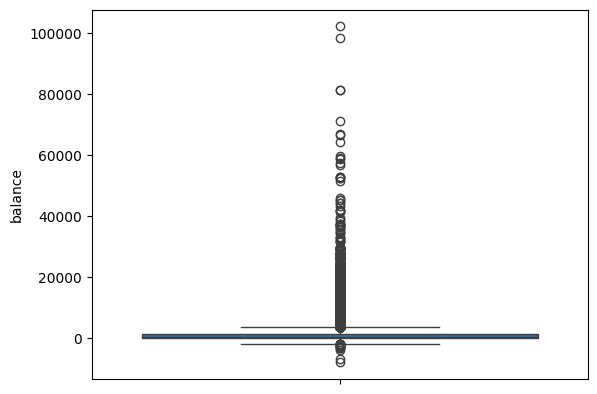

In [25]:
sns.boxplot(bank_target.balance)

In [26]:
bank_target.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5768.0
0.99    13167.1
Name: balance, dtype: float64

In [27]:
bank_target[bank_target['balance'] > 15000].describe()

,customerid,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,25510.903134,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12274.354492,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,335.000000,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,17915.000000,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,26479.000000,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,35416.500000,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,45128.000000,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


In [28]:
bank_target.salary.describe()

count     45191.000000
mean      57005.974641
std       32084.253154
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

<Axes: ylabel='salary'>

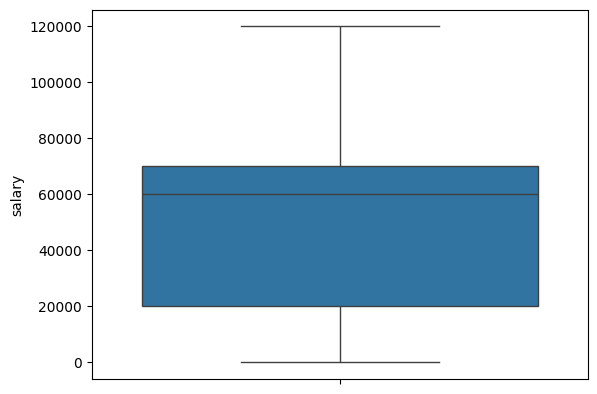

In [29]:
sns.boxplot(bank_target.salary)

This is binning the balances into different groups

- Binning usually means dividing the values in groups for ease of understanding and also prevents outliers

In [30]:
bins = [0,400,1000,4000,15000,float('inf')]
labels = ['very low', 'low','Moderate', 'High', 'Ultra Luxurious']

bank_target['balanced group'] = pd.cut(bank_target['balance'], bins=bins, labels=labels)
bank_target.head(5)

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,month,duration,campaign,pdays,previous,poutcome,response,Job,Education,balanced group
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,...,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary,Moderate
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,...,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary,very low
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,...,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary,very low
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,...,"may, 2017",92 sec,1,NaN,0,unknown,no,blue-collar,unknown,Moderate
4,5,33.0,0,1,single,no,no,no,no,unknown,...,"may, 2017",198 sec,1,NaN,0,unknown,no,unknown,unknown,very low


In [31]:
bank_target[bank_target['balance']>5000]

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,month,duration,campaign,pdays,previous,poutcome,response,Job,Education,balanced group
34,35,51.0,100000,10635,married,yes,no,yes,no,unknown,...,"may, 2017",336 sec,1,NaN,0,unknown,no,management,tertiary,High
65,66,51.0,100000,6530,married,yes,no,yes,no,unknown,...,"may, 2017",91 sec,1,NaN,0,unknown,no,management,tertiary,High
69,70,35.0,20000,12223,single,yes,no,yes,yes,unknown,...,"may, 2017",177 sec,1,NaN,0,unknown,no,blue-collar,secondary,High
70,71,57.0,20000,5935,married,yes,no,yes,yes,unknown,...,"may, 2017",258 sec,1,NaN,0,unknown,no,blue-collar,secondary,High
205,206,50.0,70000,5699,married,yes,no,yes,no,unknown,...,"may, 2017",381 sec,2,NaN,0,unknown,no,services,secondary,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45118,45119,78.0,55000,14204,married,yes,no,no,no,cellular,...,"oct, 2017",2.5 min,1,183.0,1,other,no,retired,primary,High
45127,45128,67.0,20000,16353,married,yes,no,no,no,cellular,...,"oct, 2017",3.71666666666667 min,2,NaN,0,unknown,no,blue-collar,secondary,Ultra Luxurious
45130,45131,33.0,60000,5083,married,yes,no,no,no,cellular,...,"oct, 2017",2.68333333333333 min,1,96.0,2,other,no,technician,secondary,High
45181,45182,46.0,20000,6879,married,yes,no,no,no,cellular,...,"nov, 2017",1.23333333333333 min,2,118.0,3,failure,no,blue-collar,secondary,High


In [32]:
lower_cap = bank_target['balance'].quantile(0.01)
upper_cap = bank_target['balance'].quantile(0.99)

bank_target['Balances Capped'] = bank_target['balance'].clip(lower=lower_cap, upper=upper_cap)
bank_target.head(5)

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,duration,campaign,pdays,previous,poutcome,response,Job,Education,balanced group,Balances Capped
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,...,261 sec,1,NaN,0,unknown,no,management,tertiary,Moderate,2143.0
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,...,151 sec,1,NaN,0,unknown,no,technician,secondary,very low,29.0
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,...,76 sec,1,NaN,0,unknown,no,entrepreneur,secondary,very low,2.0
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,...,92 sec,1,NaN,0,unknown,no,blue-collar,unknown,Moderate,1506.0
4,5,33.0,0,1,single,no,no,no,no,unknown,...,198 sec,1,NaN,0,unknown,no,unknown,unknown,very low,1.0


Let's move with standising the value in our dataset 

- standarising is important to make the data more readable
- It also helps eliminate errors while operation such as strings, date, time and other such types

In [33]:
bank_target.duration.head(5)

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
Name: duration, dtype: object

In [34]:
bank_target.duration.describe()

count       45191
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [35]:
# Let's convert the seconds into min

bank_target.duration[:5].apply(lambda x: float(x.split()[0])/60 if x.find('sec') > 0 else x.split()[0])

# What all did we consider 
# 1. If the duration is in min or seconds
# 2. Convert the values in min if they are in seconds

0    4.350000
1    2.516667
2    1.266667
3    1.533333
4    3.300000
Name: duration, dtype: float64

In [36]:
bank_target.duration = bank_target.duration.apply(lambda x: float(x.split()[0])/60 if x.find('sec') > 0 else x.split()[0])

In [37]:
bank_target.duration.describe()

count     45191
unique     2646
top         1.5
freq        138
Name: duration, dtype: object

In [38]:
bank_target.head(10)

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,duration,campaign,pdays,previous,poutcome,response,Job,Education,balanced group,Balances Capped
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,...,4.35,1,NaN,0,unknown,no,management,tertiary,Moderate,2143.0
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,...,2.516667,1,NaN,0,unknown,no,technician,secondary,very low,29.0
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,...,1.266667,1,NaN,0,unknown,no,entrepreneur,secondary,very low,2.0
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,...,1.533333,1,NaN,0,unknown,no,blue-collar,unknown,Moderate,1506.0
4,5,33.0,0,1,single,no,no,no,no,unknown,...,3.3,1,NaN,0,unknown,no,unknown,unknown,very low,1.0
5,6,35.0,100000,231,married,yes,no,yes,no,unknown,...,2.316667,1,NaN,0,unknown,no,management,tertiary,very low,231.0
6,7,28.0,100000,447,single,no,no,yes,yes,unknown,...,3.616667,1,NaN,0,unknown,no,management,tertiary,low,447.0
7,8,42.0,120000,2,divorced,no,yes,yes,no,unknown,...,6.333333,1,NaN,0,unknown,no,entrepreneur,tertiary,very low,2.0
8,9,58.0,55000,121,married,yes,no,yes,no,unknown,...,0.833333,1,NaN,0,unknown,no,retired,primary,very low,121.0
9,10,43.0,60000,593,single,yes,no,yes,no,unknown,...,0.916667,1,NaN,0,unknown,no,technician,secondary,low,593.0


**Univarient Analysis **

There are analysis done considering just one variable at a time 

In [39]:
bank_target.dtypes

customerid            int64
age                 float64
salary                int64
balance               int64
marital              object
targeted             object
default              object
housing              object
loan                 object
contact              object
day                   int64
month                object
duration             object
campaign              int64
pdays               float64
previous              int64
poutcome             object
response             object
Job                  object
Education            object
balanced group     category
Balances Capped     float64
dtype: object

In [40]:
##Marital

In [41]:
bank_target.marital.value_counts()

marital
married     27204
single      12786
divorced     5201
Name: count, dtype: int64

In [42]:
bank_target.marital.value_counts(normalize=True)*100

marital
married     60.197827
single      28.293244
divorced    11.508929
Name: proportion, dtype: float64

<Axes: ylabel='marital'>

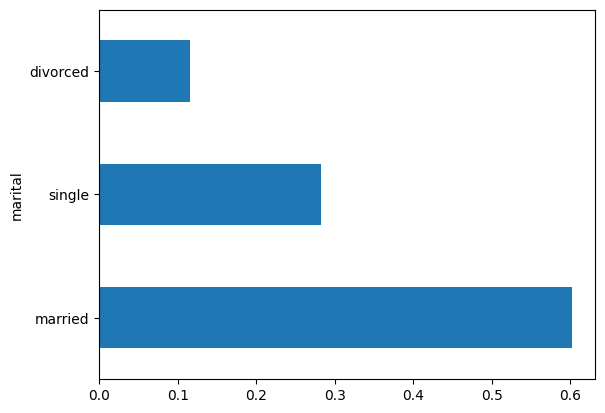

In [43]:
bank_target.marital.value_counts(normalize=True).plot.barh()

In [44]:
bank_target.select_dtypes(include=['object', 'category']).columns

Index(['marital', 'targeted', 'default', 'housing', 'loan', 'contact', 'month',
       'duration', 'poutcome', 'response', 'Job', 'Education',
       'balanced group'],
      dtype='object')

<Axes: ylabel='Job'>

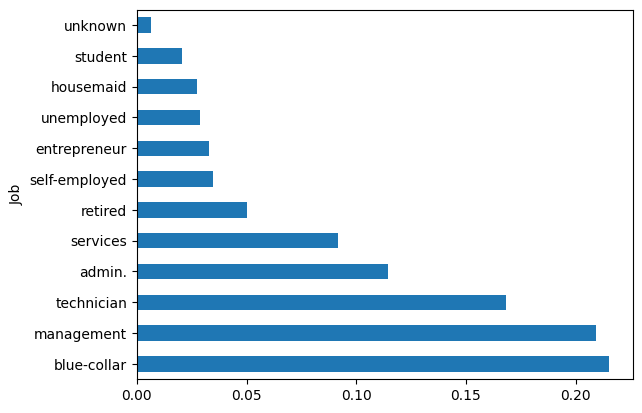

In [45]:
bank_target.Job.value_counts(normalize=True).plot.barh()

In [46]:
## Education Variable   

In [47]:
bank_target.Education.value_counts()

Education
secondary    23193
tertiary     13295
primary       6846
unknown       1857
Name: count, dtype: int64

In [48]:
bank_target.Education.value_counts(normalize=True)*100

Education
secondary    51.322166
tertiary     29.419575
primary      15.149034
unknown       4.109225
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

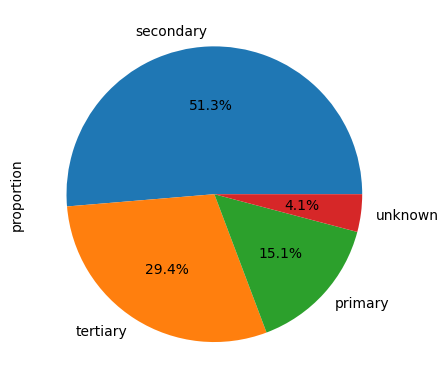

In [49]:
bank_target.Education.value_counts(normalize=True).plot.pie(
    autopct = '%1.1f%%'
)

In [50]:
bank_target.poutcome.value_counts()

poutcome
unknown    36944
failure     4898
other       1840
success     1509
Name: count, dtype: int64

In [51]:
bank_target[~bank_target['poutcome'].isin(['unknown', 'other'])]


,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,duration,campaign,pdays,previous,poutcome,response,Job,Education,balanced group,Balances Capped
24060,24061,33.0,50000,882,married,yes,no,no,no,telephone,...,0.65,1,151.0,3,failure,no,admin.,tertiary,low,882.0
24064,24065,33.0,70000,3444,married,yes,no,yes,no,telephone,...,2.4,1,91.0,4,failure,yes,services,secondary,Moderate,3444.0
24077,24078,36.0,100000,0,married,yes,no,yes,no,telephone,...,2.33333333333333,1,143.0,3,failure,yes,management,tertiary,NaN,0.0
24080,24081,56.0,60000,589,married,yes,no,yes,no,unknown,...,8.63333333333333,1,147.0,2,success,yes,technician,secondary,low,589.0
24127,24128,51.0,50000,3132,single,yes,no,no,no,telephone,...,7.48333333333333,1,176.0,1,failure,no,admin.,secondary,Moderate,3132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,45195,59.0,100000,138,married,yes,no,yes,yes,cellular,...,2.7,2,187.0,5,failure,no,management,tertiary,very low,138.0
45195,45196,68.0,55000,1146,married,yes,no,no,no,cellular,...,3.53333333333333,1,187.0,6,success,yes,retired,secondary,Moderate,1146.0
45201,45202,53.0,100000,583,married,yes,no,no,no,cellular,...,3.76666666666667,1,184.0,4,success,yes,management,tertiary,low,583.0
45204,45205,73.0,55000,2850,married,yes,no,no,no,cellular,...,5,1,40.0,8,failure,yes,retired,secondary,Moderate,2850.0


In [52]:
bank_target.poutcome.value_counts()

poutcome
unknown    36944
failure     4898
other       1840
success     1509
Name: count, dtype: int64

In [53]:
bank_target.poutcome.value_counts(normalize=True)*100

poutcome
unknown    81.750791
failure    10.838441
other       4.071607
success     3.339160
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

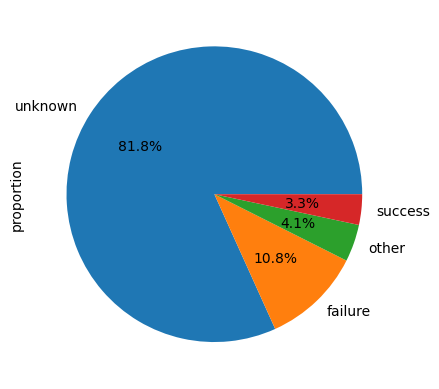

In [54]:
bank_target.poutcome.value_counts(normalize=True).plot.pie(
    autopct = '%1.1f%%'
)

<Axes: ylabel='poutcome'>

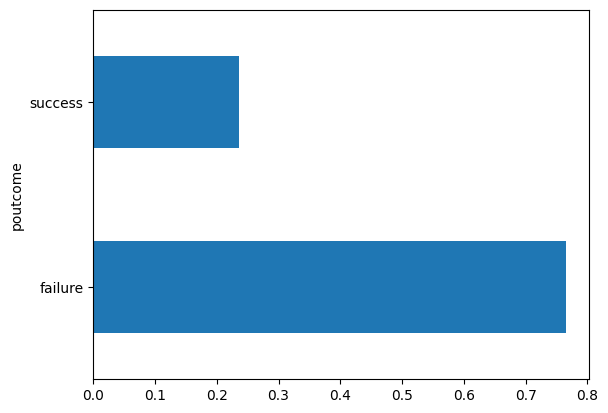

In [55]:
bank_target[~(bank_target.poutcome).isin(['unknown','other'])].poutcome.value_counts(normalize=True).plot.barh()

<Axes: ylabel='poutcome'>

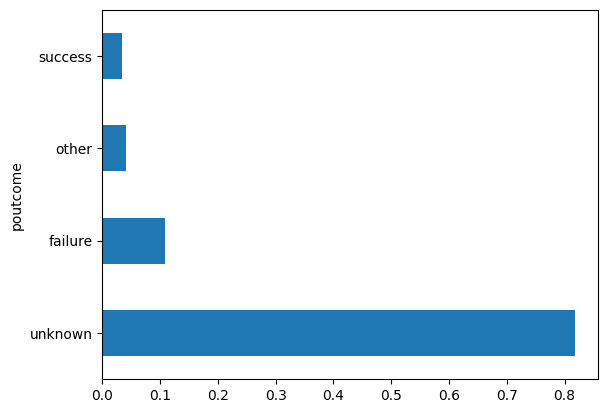

In [56]:
bank_target.poutcome.value_counts(normalize=True).plot.barh()

<Axes: ylabel='poutcome'>

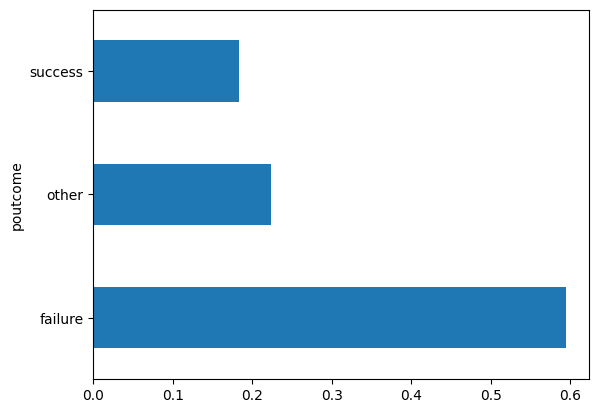

In [57]:
bank_target[~(bank_target.poutcome == 'unknown')].poutcome.value_counts(normalize=True).plot.barh()

**Let's now take response into the consideration now**

In [58]:
## Response that is out target dataset  

In [59]:
bank_target.response.value_counts()

response
no     39876
yes     5285
Name: count, dtype: int64

In [60]:
bank_target.response.value_counts(normalize=True)*100

response
no     88.297425
yes    11.702575
Name: proportion, dtype: float64

<Axes: ylabel='response'>

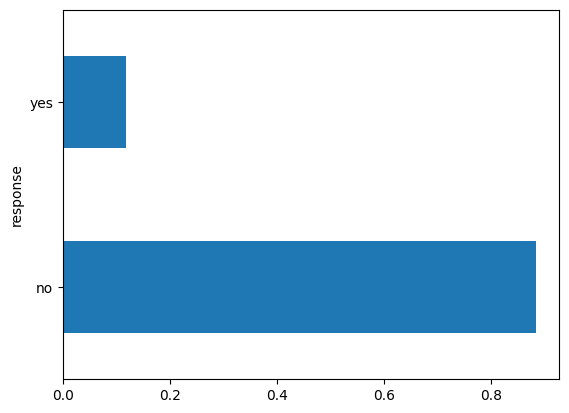

In [61]:
bank_target.response.value_counts(normalize=True).plot.barh()

<Axes: ylabel='proportion'>

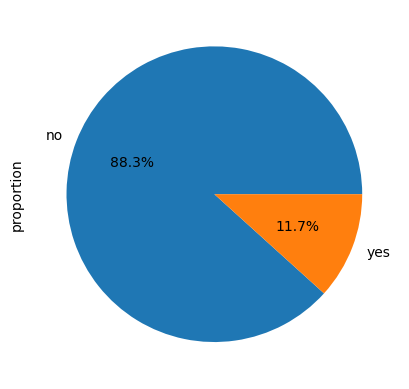

In [62]:
bank_target.response.value_counts(normalize=True).plot.pie(
    autopct = '%1.1f%%'
)

```python
Let's deep dive into bi variate and multi variate how they come about and let's chekc how to come to the conclusion
```



**Bi-Variate **

- Numerical to numerical 

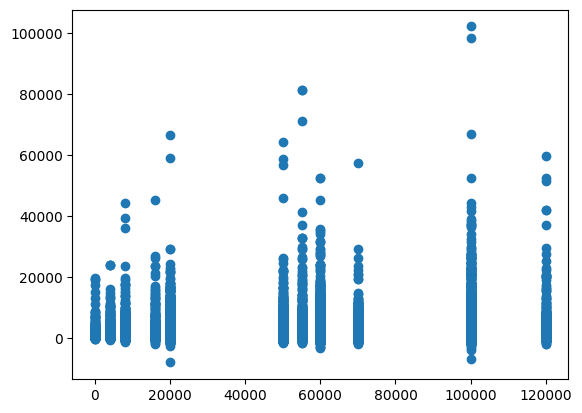

In [63]:
plt.scatter(bank_target.salary, bank_target.balance)

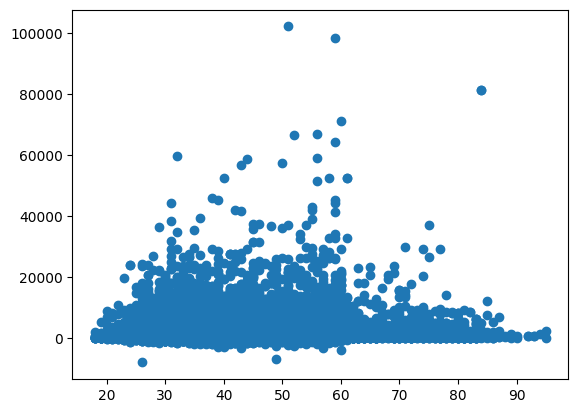

In [64]:
plt.scatter(bank_target.age, bank_target.balance)
plt.show()

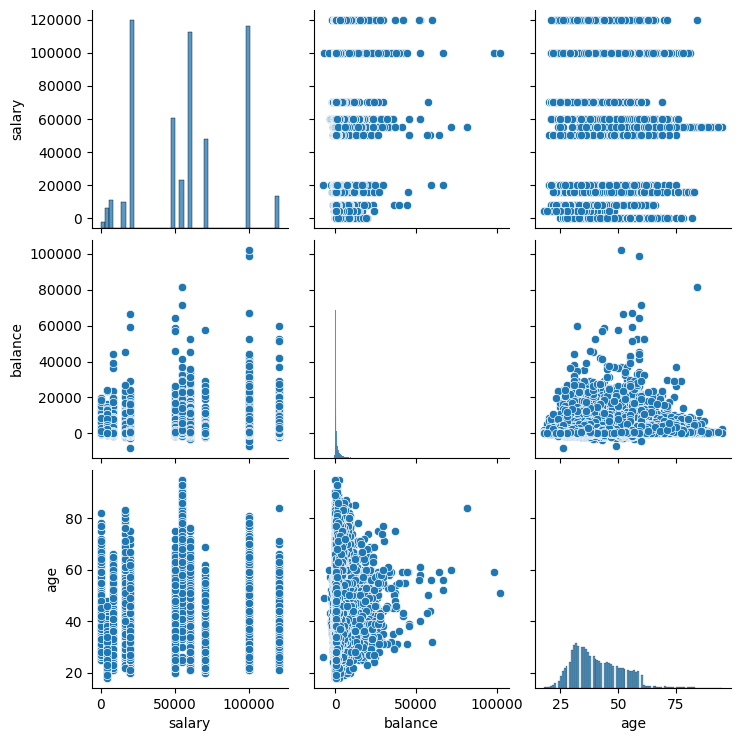

In [65]:
sns.pairplot(data=bank_target, vars= ['salary', 'balance', 'age'])

## Quantify using correalation values

In [66]:
bank_target[['age', 'salary','balance']].corr()

,age,salary,balance
age,1.000000,0.024374,0.097755
salary,0.024374,1.000000,0.055505
balance,0.097755,0.055505,1.000000


### Correlation Heatmpa

<Axes: >

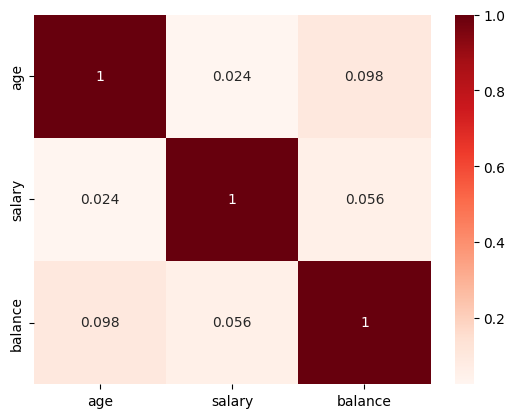

In [67]:
sns.heatmap(bank_target[['age', 'salary','balance']].corr(), annot=True, cmap='Reds')

### Categorical to Numerical 

In [68]:
bank_target.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [69]:
bank_target.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

<Axes: xlabel='response', ylabel='salary'>

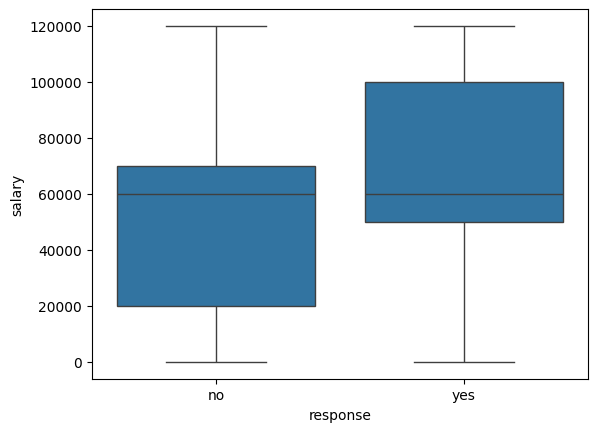

In [70]:
sns.boxplot(data=bank_target, x= 'response', y = 'salary')

In [71]:
### Let's Look at Response Vs Balance 

In [72]:
bank_target.groupby('response')['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [73]:
bank_target.groupby('response')['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

<Axes: xlabel='response', ylabel='balance'>

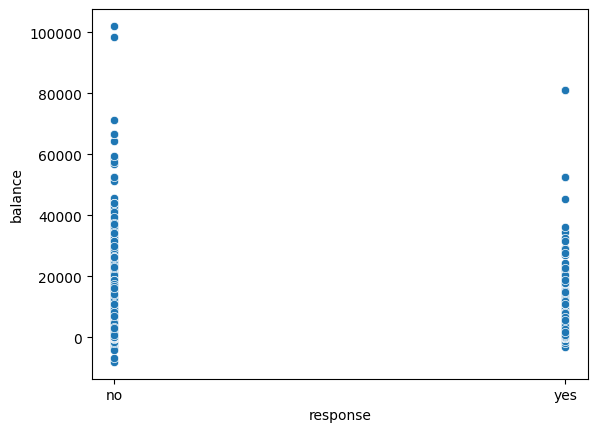

In [74]:
sns.scatterplot(data=bank_target,x='response', y='balance')

In [75]:
bank_target.groupby('response')['balance'].describe()

,count,mean,std,min,25%,50%,75%,max
response,,,,,,,,
no,39876.0,1304.292281,2975.358156,-8019.0,58.75,417.0,1345.0,102127.0
yes,5285.0,1804.681362,3502.216259,-3058.0,210.00,733.0,2159.0,81204.0


<Axes: xlabel='response'>

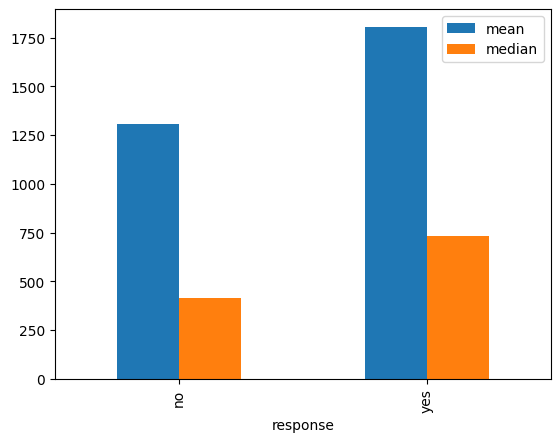

In [76]:
bank_target.groupby('response')['balance'].aggregate(['mean','median']).plot.bar()

In [77]:
bank_target.groupby('Education')['salary'].median().sort_values(ascending=False)

Education
tertiary     100000.0
secondary     55000.0
unknown       50000.0
primary       20000.0
Name: salary, dtype: float64

In [78]:
bank_target

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,duration,campaign,pdays,previous,poutcome,response,Job,Education,balanced group,Balances Capped
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,...,4.35,1,NaN,0,unknown,no,management,tertiary,Moderate,2143.0
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,...,2.516667,1,NaN,0,unknown,no,technician,secondary,very low,29.0
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,...,1.266667,1,NaN,0,unknown,no,entrepreneur,secondary,very low,2.0
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,...,1.533333,1,NaN,0,unknown,no,blue-collar,unknown,Moderate,1506.0
4,5,33.0,0,1,single,no,no,no,no,unknown,...,3.3,1,NaN,0,unknown,no,unknown,unknown,very low,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,yes,no,no,no,cellular,...,16.2833333333333,3,NaN,0,unknown,yes,technician,tertiary,low,825.0
45207,45208,71.0,55000,1729,divorced,yes,no,no,no,cellular,...,7.6,2,NaN,0,unknown,yes,retired,primary,Moderate,1729.0
45208,45209,72.0,55000,5715,married,yes,no,no,no,cellular,...,18.7833333333333,5,184.0,3,success,yes,retired,secondary,High,5715.0
45209,45210,57.0,20000,668,married,yes,no,no,no,telephone,...,8.46666666666667,4,NaN,0,unknown,no,blue-collar,secondary,low,668.0


### Categorical Vs Categorical 

In [79]:
bank_target.groupby('Education')['salary'].median()

Education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

<Axes: xlabel='Education', ylabel='salary'>

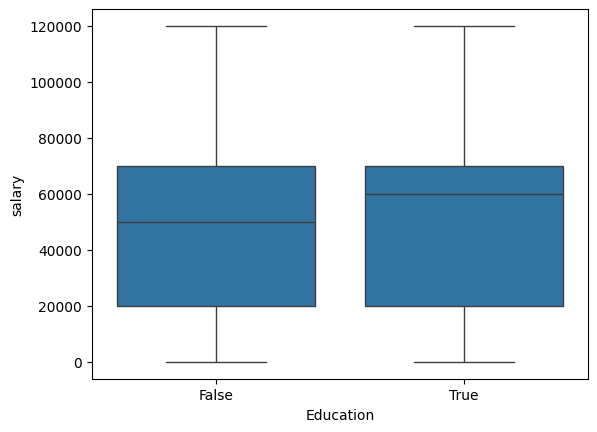

In [80]:
sns.boxplot(data=bank_target, x =(~(bank_target['Education'].isin(['unknown']))), y ='salary')

#bank_target[~(bank_target['Education'].isin(['unknown']))].Education.value_counts(normalize=True).plot.box()

In [81]:
# Since the response are either in yes or no we can use a flag to denote that numerically 

In [82]:
bank_target['response_flag'] = np.where(bank_target.response == 'yes', 1 , 0)
bank_target

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,response,Job,Education,balanced group,Balances Capped,response_flag
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,...,1,NaN,0,unknown,no,management,tertiary,Moderate,2143.0,0
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,...,1,NaN,0,unknown,no,technician,secondary,very low,29.0,0
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,...,1,NaN,0,unknown,no,entrepreneur,secondary,very low,2.0,0
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,...,1,NaN,0,unknown,no,blue-collar,unknown,Moderate,1506.0,0
4,5,33.0,0,1,single,no,no,no,no,unknown,...,1,NaN,0,unknown,no,unknown,unknown,very low,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,yes,no,no,no,cellular,...,3,NaN,0,unknown,yes,technician,tertiary,low,825.0,1
45207,45208,71.0,55000,1729,divorced,yes,no,no,no,cellular,...,2,NaN,0,unknown,yes,retired,primary,Moderate,1729.0,1
45208,45209,72.0,55000,5715,married,yes,no,no,no,cellular,...,5,184.0,3,success,yes,retired,secondary,High,5715.0,1
45209,45210,57.0,20000,668,married,yes,no,no,no,telephone,...,4,NaN,0,unknown,no,blue-collar,secondary,low,668.0,0


In [83]:
bank_target.response_flag.value_counts()

response_flag
0    39906
1     5285
Name: count, dtype: int64

In [84]:
bank_target.response_flag.value_counts(normalize=True)*100

response_flag
0    88.305194
1    11.694806
Name: proportion, dtype: float64

In [85]:
#To find the percentage of missing values in a dataset

bank_target.isnull().mean() * 100

customerid          0.000000
age                 0.000000
salary              0.000000
balance             0.000000
marital             0.000000
targeted            0.000000
default             0.000000
housing             0.000000
loan                0.000000
contact             0.000000
day                 0.000000
month               0.000000
duration            0.000000
campaign            0.000000
pdays              81.739727
previous            0.000000
poutcome            0.000000
response            0.066385
Job                 0.000000
Education           0.000000
balanced group     16.098338
Balances Capped     0.000000
response_flag       0.000000
dtype: float64

### Education Vs response_rate 

In [86]:
bank_target.groupby('Education')['response_flag'].mean()*100

Education
primary       8.632778
secondary    10.554909
tertiary     14.998120
unknown      13.570275
Name: response_flag, dtype: float64

### Marital vs Response Rate

In [87]:
bank_target.groupby('marital')['response_flag'].mean()*100

marital
divorced    11.940012
married     10.119835
single      14.946035
Name: response_flag, dtype: float64

<Axes: xlabel='marital'>

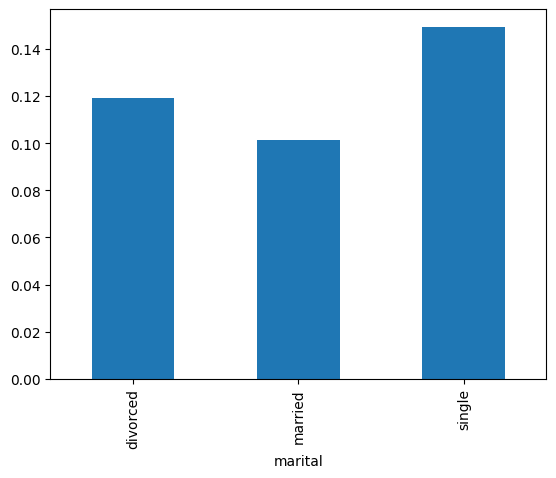

In [88]:
bank_target.groupby('marital')['response_flag'].mean().plot.bar()

<Axes: xlabel='loan'>

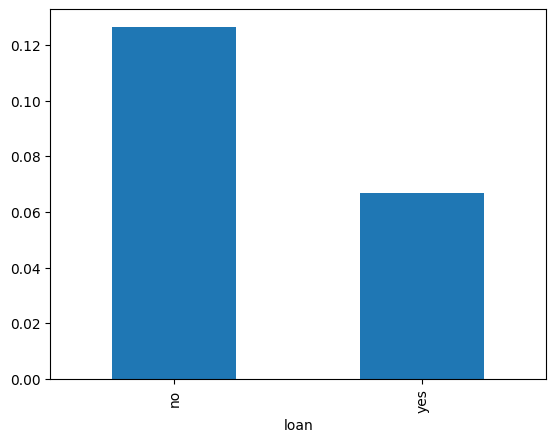

In [89]:
bank_target.groupby('loan')['response_flag'].mean().plot.bar()

<Axes: xlabel='housing'>

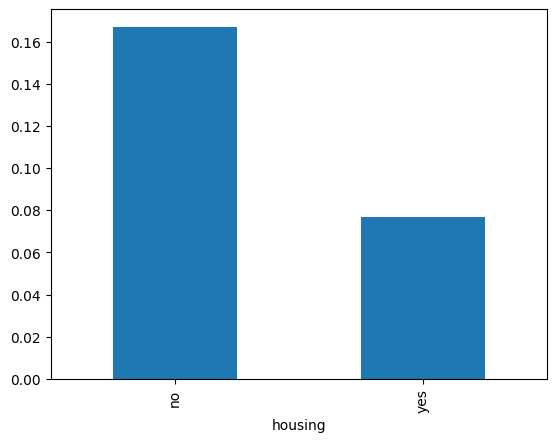

In [90]:
bank_target.groupby('housing')['response_flag'].mean().plot.bar()

### Age Vs Response 

<Axes: xlabel='response', ylabel='age'>

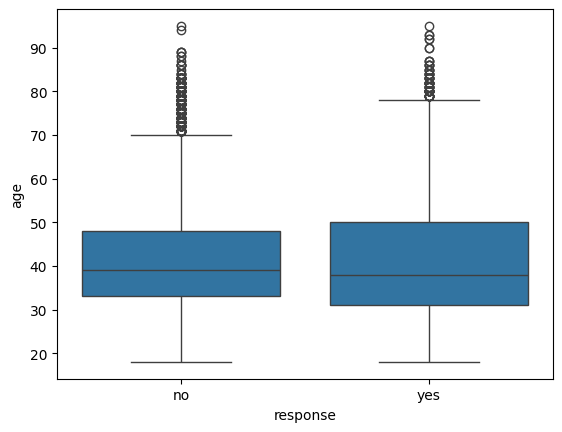

In [91]:
sns.boxplot(data=bank_target, x = 'response', y= 'age')

In [92]:
## Bucketing ages to make the data more redable 

?pd.cut

Signature:
pd.cut(
    x,
    bins,
    right: 'bool' = True,
    labels=None,
    retbins: 'bool' = False,
    precision: 'int' = 3,
    include_lowest: 'bool' = False,
    duplicates: 'str' = 'raise',
    ordered: 'bool' = True,
)
Docstring:
Bin values into discrete intervals.

Use `cut` when you need to segment and sort data values into bins. This
function is also useful for going from a continuous variable to a
categorical variable. For example, `cut` could convert ages to groups of
age ranges. Supports binning into an equal number of bins, or a
pre-specified array of bins.

Parameters
----------
x : array-like
    The input array to be binned. Must be 1-dimensional.
bins : int, sequence of scalars, or IntervalIndex
    The criteria to bin by.

    * int : Defines the number of equal-width bins in the range of `x`. The
      range of `x` is extended by .1% on each side to include the minimum
      and maximum values of `x`.
    * sequence of scalars : Defines the bin edges allowing

In [93]:
pd.cut(bank_target.age,[0,30,40,50,60,9999], labels= ['<30','30-40','40-50','50-60','60+'])


0        50-60
1        40-50
2        30-40
3        40-50
4        30-40
         ...  
45206    50-60
45207      60+
45208      60+
45209    50-60
45210    30-40
Name: age, Length: 45191, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [94]:
bank_target['age_bucket'] = pd.cut(bank_target.age,[0,30,40,50,60,9999], labels= ['<30','30-40','40-50','50-60','60+'])

In [95]:
bank_target.age_bucket.value_counts(normalize=True)*100

age_bucket
30-40    39.120621
40-50    24.861145
50-60    17.837623
<30      15.551769
60+       2.628842
Name: proportion, dtype: float64

C:\Users\RUSHANK\AppData\Local\Temp\ipykernel_17728\3568863199.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bank_target.groupby(['age_bucket'])['response_flag'].mean().plot()


<Axes: xlabel='age_bucket'>

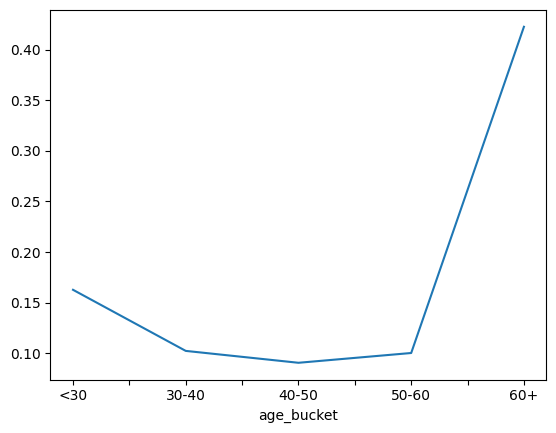

In [96]:
bank_target.groupby(['age_bucket'])['response_flag'].mean().plot()

C:\Users\RUSHANK\AppData\Local\Temp\ipykernel_17728\2180087490.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bank_target.groupby(['age_bucket'])['response_flag'].mean().plot()


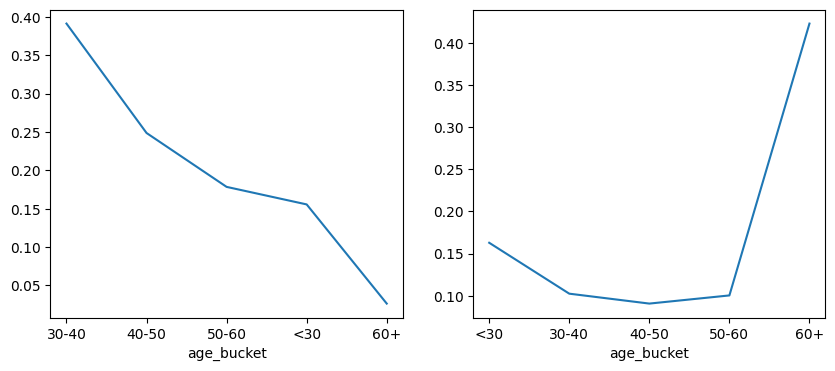

In [97]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
bank_target.age_bucket.value_counts(normalize=True).plot()
plt.subplot(1,2,2)
bank_target.groupby(['age_bucket'])['response_flag'].mean().plot()
plt.show()

C:\Users\RUSHANK\AppData\Local\Temp\ipykernel_17728\1688722887.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bank_target.groupby(['age_bucket'])['response_flag'].mean().plot.bar()


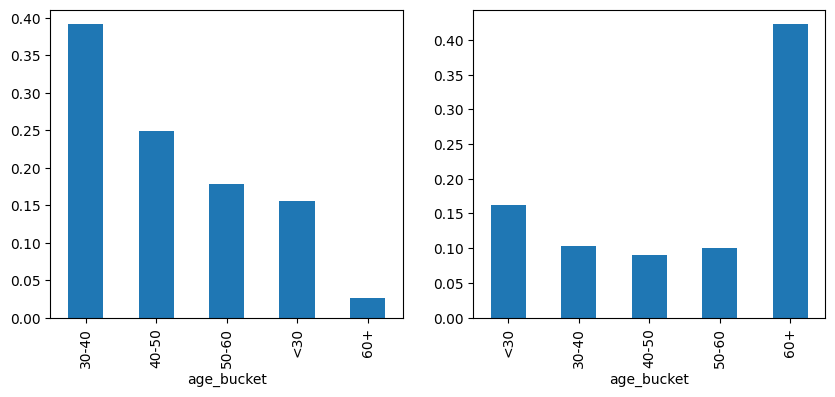

In [98]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
bank_target.age_bucket.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
bank_target.groupby(['age_bucket'])['response_flag'].mean().plot.bar()
plt.show()

### More than 2 varaibles (Multi Variable)

In [100]:
res = pd.pivot_table(data=bank_target, index='Education', columns='marital', values='response_flag')
res

marital,divorced,married,single
Education,,,
primary,0.138667,0.075515,0.106808
secondary,0.103485,0.094595,0.129213
tertiary,0.137415,0.129761,0.183546
unknown,0.142012,0.122414,0.162879


<Axes: xlabel='marital', ylabel='Education'>

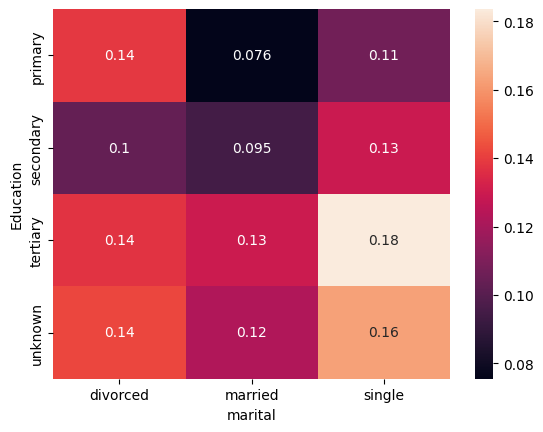

In [101]:
sns.heatmap(res, annot=True)

<Axes: xlabel='marital', ylabel='Education'>

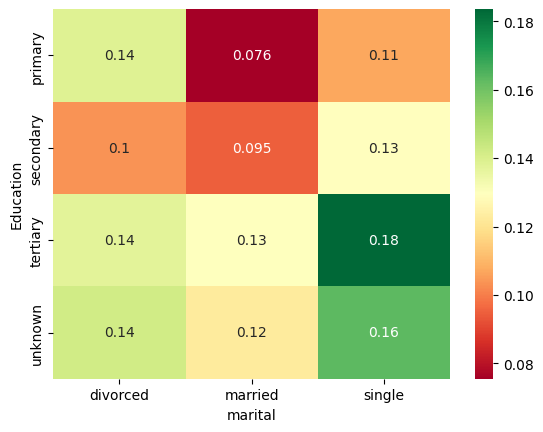

In [102]:
sns.heatmap(res, annot=True, cmap='RdYlGn')

<Axes: xlabel='marital', ylabel='Education'>

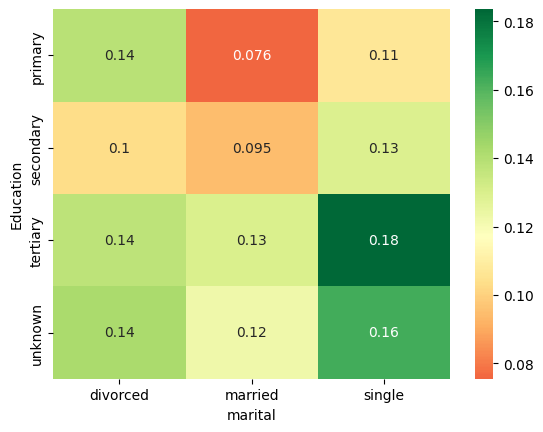

In [103]:
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.117)

### Job vs Marital Vs Response

In [109]:
job_marital = pd.pivot_table(data=bank_target, index='Job', columns='marital', values='response_flag')
job_marital.describe()

marital,divorced,married,single
count,12.000000,12.000000,12.000000
mean,0.125521,0.112391,0.159222
std,0.060959,0.048384,0.052387
min,0.058824,0.062742,0.105760
25%,0.083660,0.075377,0.119702
50%,0.108913,0.103082,0.149164
75%,0.157989,0.127775,0.179999
max,0.283019,0.220682,0.293850


<Axes: xlabel='marital', ylabel='Job'>

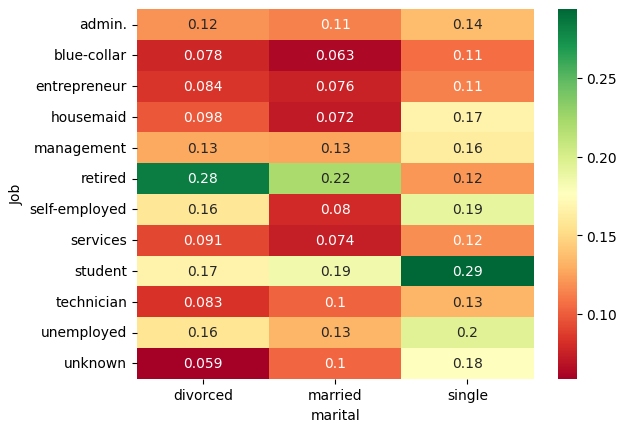

In [108]:
sns.heatmap(job_marital, annot=True, cmap='RdYlGn')

<Axes: xlabel='marital', ylabel='Job'>

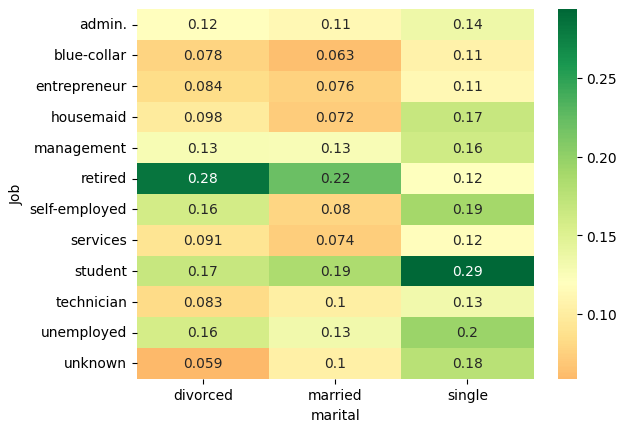

In [110]:
sns.heatmap(job_marital, annot=True, cmap='RdYlGn', center=0.12)

### Education vs Poutcome Vs Response

In [112]:
edu_res = pd.pivot_table(data=bank_target, index='Education', columns='poutcome', values='response_flag')
edu_res.describe()

poutcome,failure,other,success,unknown
count,4.000000,4.000000,4.000000,4.000000
mean,0.131089,0.176215,0.646497,0.092955
std,0.038349,0.040252,0.029455,0.018747
min,0.088785,0.140831,0.609023,0.071735
25%,0.103888,0.142790,0.632968,0.081084
50%,0.133557,0.171721,0.648977,0.092947
75%,0.160758,0.205147,0.662507,0.104819
max,0.168456,0.220588,0.679012,0.114192


<Axes: xlabel='poutcome', ylabel='Education'>

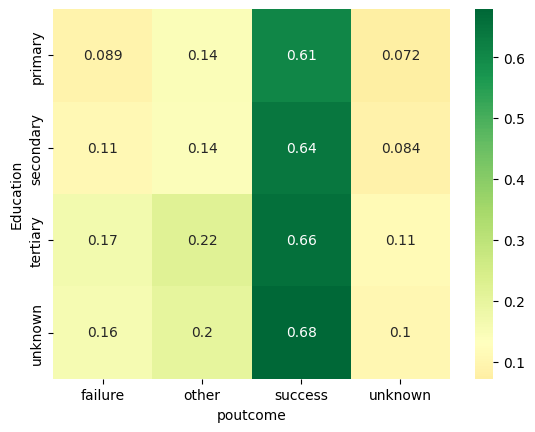

In [115]:
sns.heatmap(edu_res, annot=True, cmap='RdYlGn',center=0.13)

In [117]:
bank_target[bank_target.pdays>0].response_flag.mean()

np.float64(0.23061076102762967)

<Axes: xlabel='poutcome', ylabel='Education'>

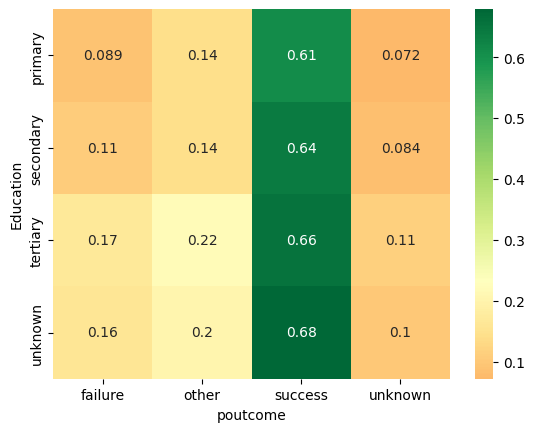

In [119]:
sns.heatmap(edu_res, annot=True, cmap='RdYlGn', center=0.2308)

In [121]:
bank_target

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,pdays,previous,poutcome,response,Job,Education,balanced group,Balances Capped,response_flag,age_bucket
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,...,NaN,0,unknown,no,management,tertiary,Moderate,2143.0,0,50-60
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,...,NaN,0,unknown,no,technician,secondary,very low,29.0,0,40-50
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,...,NaN,0,unknown,no,entrepreneur,secondary,very low,2.0,0,30-40
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,...,NaN,0,unknown,no,blue-collar,unknown,Moderate,1506.0,0,40-50
4,5,33.0,0,1,single,no,no,no,no,unknown,...,NaN,0,unknown,no,unknown,unknown,very low,1.0,0,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,yes,no,no,no,cellular,...,NaN,0,unknown,yes,technician,tertiary,low,825.0,1,50-60
45207,45208,71.0,55000,1729,divorced,yes,no,no,no,cellular,...,NaN,0,unknown,yes,retired,primary,Moderate,1729.0,1,60+
45208,45209,72.0,55000,5715,married,yes,no,no,no,cellular,...,184.0,3,success,yes,retired,secondary,High,5715.0,1,60+
45209,45210,57.0,20000,668,married,yes,no,no,no,telephone,...,NaN,0,unknown,no,blue-collar,secondary,low,668.0,0,50-60
